In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

You should consider upgrading via the 'C:\Users\misha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


## financial_accounting.csv

Financial ledger containing transaction records as rows. Monthly balance is perfectly balanced.

### Load

In [21]:
df_financial_accounting = pd.read_csv('../data/financial_accounting.csv')
df_financial_accounting.head()

,Date,Account,Description,Debit,Credit,Category,Transaction_Type,Customer_Vendor,Payment_Method,Reference
0,2023-08-21,Accounts Payable,Transaction 1,112.56,112.56,Asset,Sale,Customer 39,Cash,67471
1,2023-08-13,Accounts Receivable,Transaction 2,775.86,775.86,Revenue,Purchase,Customer 3,Check,92688
2,2023-05-11,Accounts Receivable,Transaction 3,332.81,332.81,Revenue,Transfer,Customer 36,Check,72066
3,2023-02-26,Accounts Receivable,Transaction 4,203.71,203.71,Asset,Purchase,Customer 57,Check,27973
4,2023-11-06,Accounts Receivable,Transaction 5,986.26,986.26,Asset,Expense,Customer 92,Check,29758


### Describe

In [22]:
# Check for missing values
print(df_financial_accounting.isnull().sum())
print(df_financial_accounting.duplicated().sum())

# --- Descriptive Statistics ---
print(df_financial_accounting.describe())

Date                0
Account             0
Description         0
Debit               0
Credit              0
Category            0
Transaction_Type    0
Customer_Vendor     0
Payment_Method      0
Reference           0
dtype: int64
0
               Debit         Credit      Reference
count  100000.000000  100000.000000  100000.000000
mean      607.747368     607.747368   54859.916200
std       254.906370     254.906370   25956.740346
min         3.880000       3.880000   10000.000000
25%       401.637500     401.637500   32367.000000
50%       634.080000     634.080000   54810.500000
75%       829.990000     829.990000   77302.250000
max       999.990000     999.990000   99999.000000


In [23]:
print(df_financial_accounting['Account'].unique())

['Accounts Payable' 'Accounts Receivable' 'Cash' 'Inventory']


### Analyze Debit and Credit Transactions

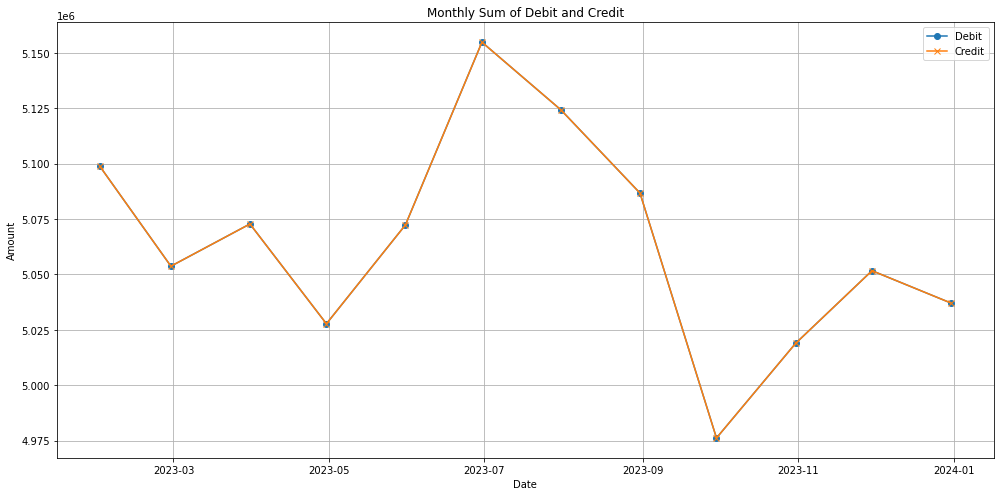

In [56]:
df_financial_accounting['Date'] = pd.to_datetime(df_financial_accounting['Date'])

# Time Series Analysis
monthly_summary = df_financial_accounting.resample('M', on='Date').sum() # Sum 'Debit' and 'Credit' on a monthly basis

plt.figure(figsize=(14,7)) 
plt.plot(monthly_summary.index, monthly_summary['Debit'], marker='o', label='Debit')
plt.plot(monthly_summary.index, monthly_summary['Credit'], marker='x', label='Credit')
plt.title('Monthly Sum of Debit and Credit')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

## managerial_accounting.csv

In [57]:
df_managerial_accounting = pd.read_csv('../data/managerial_accounting.csv')
df_managerial_accounting.head()

,Transaction Date,Account Number,Transaction Type,Transaction Amount,Category,Department,Project,Location,Note,Reference Number
0,2021-06-16 18:55:06,53057,Expense,353.26,Utilities,Marketing,Project B,Houston,Sample transaction note,4476281
1,2022-02-08 11:13:17,72230,Liability Payment,451.97,Assets,Sales,Project D,Houston,Sample transaction note,1217976
2,2022-04-11 09:18:18,20299,Liability Payment,452.15,Loans,Finance,Project B,New York,Sample transaction note,5665021
3,2021-10-18 07:00:06,93951,Expense,244.36,Utilities,Marketing,Project B,Los Angeles,Sample transaction note,2571107
4,2021-08-20 06:28:57,90300,Expense,706.53,Supplies,Sales,Project D,Los Angeles,Sample transaction note,1419466


In [62]:

print(df_managerial_accounting['Transaction Type'].unique())
print(df_managerial_accounting['Category'].unique())
print(df_managerial_accounting['Department'].unique())
print(df_managerial_accounting['Project'].unique())

['Expense' 'Liability Payment' 'Revenue' 'Asset Purchase']
['Utilities' 'Assets' 'Loans' 'Supplies' 'Royalties' 'Service Revenue'
 'Salaries' 'Rent' 'Product Sales']
['Marketing' 'Sales' 'Finance' 'HR']
['Project B' 'Project D' 'Project C' 'Project A']


In [58]:
# Check for missing values
print(df_financial_accounting.isnull().sum())
print(df_financial_accounting.duplicated().sum())

# --- Descriptive Statistics ---
print(df_financial_accounting.describe())

Date                0
Account             0
Description         0
Debit               0
Credit              0
Category            0
Transaction_Type    0
Customer_Vendor     0
Payment_Method      0
Reference           0
dtype: int64
0
               Debit         Credit      Reference
count  100000.000000  100000.000000  100000.000000
mean      607.747368     607.747368   54859.916200
std       254.906370     254.906370   25956.740346
min         3.880000       3.880000   10000.000000
25%       401.637500     401.637500   32367.000000
50%       634.080000     634.080000   54810.500000
75%       829.990000     829.990000   77302.250000
max       999.990000     999.990000   99999.000000


## Bank Transaction Data.xlsx

Consolidated and extracted bank account statements of various bank accounts.

In [32]:
df_bank_transaction_data = pd.read_excel('../data/Bank Transaction Data.xlsx')
df_bank_transaction_data.head()

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1000000.0,.
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2000000.0,.
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.0,2500000.0,.
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.0,5500000.0,.
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,NaN,500000.0,6000000.0,.


In [33]:
# Check for missing values
print(df_bank_transaction_data.isnull().sum())
print(df_bank_transaction_data.duplicated().sum())

# --- Descriptive Statistics ---
print(df_bank_transaction_data.describe())

Account No                  0
DATE                        0
TRANSACTION DETAILS      2499
CHQ.NO.                115296
VALUE DATE                  0
WITHDRAWAL AMT          62652
DEPOSIT AMT             53549
BALANCE AMT                 0
.                           0
dtype: int64
39
             CHQ.NO.  WITHDRAWAL AMT   DEPOSIT AMT   BALANCE AMT
count     905.000000    5.354900e+04  6.265200e+04  1.162010e+05
mean   791614.503867    4.489190e+06  3.806586e+06 -1.404852e+09
std    151205.932910    1.084850e+07  8.683093e+06  5.348202e+08
min         1.000000    1.000000e-02  1.000000e-02 -2.045201e+09
25%    704231.000000    3.000000e+03  9.900000e+04 -1.690383e+09
50%    873812.000000    4.708300e+04  4.265000e+05 -1.661395e+09
75%    874167.000000    5.000000e+06  4.746411e+06 -1.236888e+09
max    874525.000000    4.594475e+08  5.448000e+08  8.500000e+06


### Analyze Balance

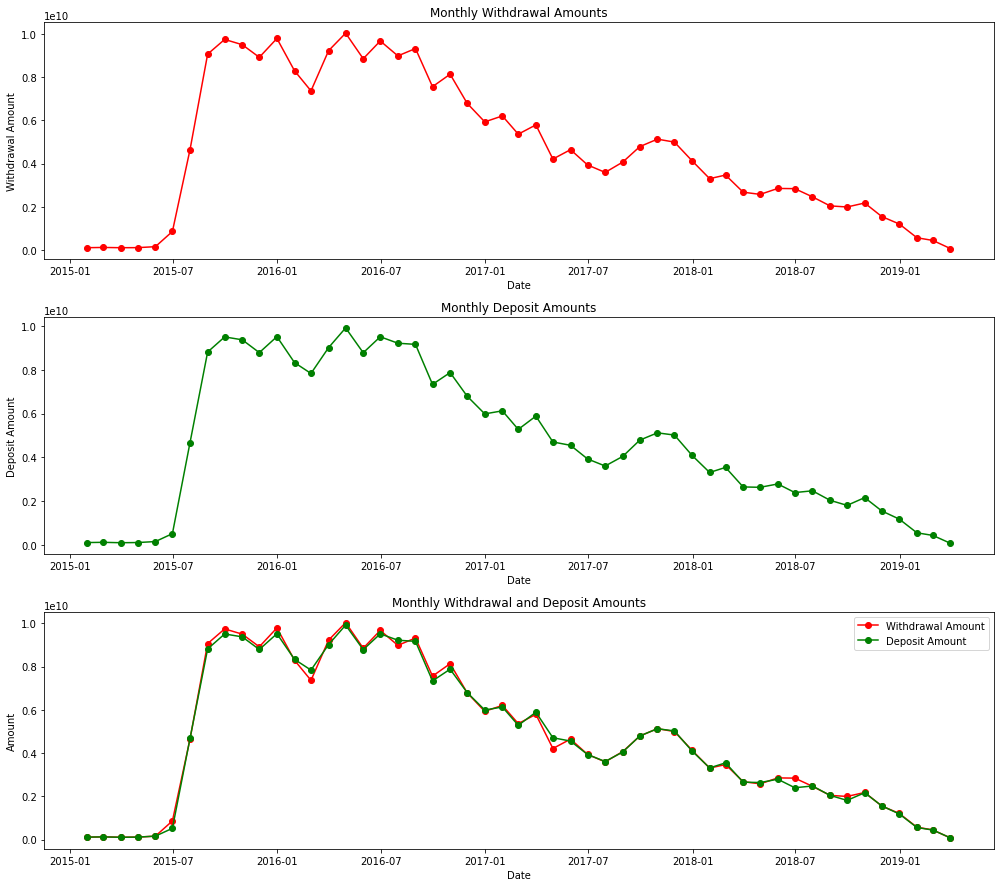

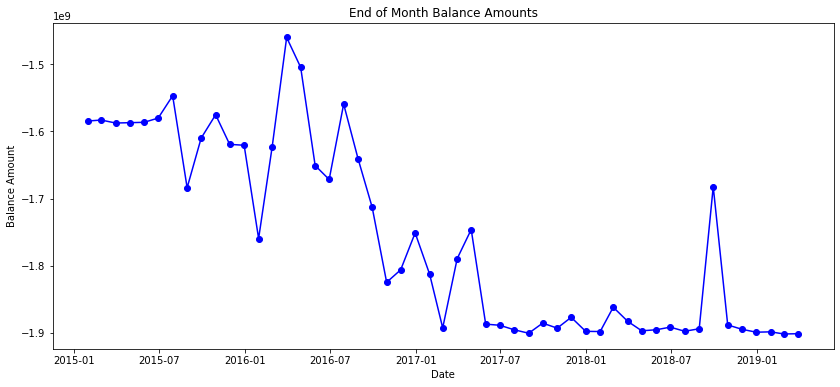

In [49]:
## Withdrawal and Deposit Amounts
monthly_data = df_bank_transaction_data.resample('M', on='DATE').sum() # Sum 'WITHDRAWAL AMT' and 'DEPOSIT AMT' on a monthly basis

plt.figure(figsize=(14,12))

plt.subplot(3, 1, 1)
plt.plot(monthly_data.index, monthly_data['WITHDRAWAL AMT'], marker='o', color='red')
plt.title('Monthly Withdrawal Amounts')
plt.xlabel('Date')
plt.ylabel('Withdrawal Amount')
plt.subplot(3, 1, 2)

plt.plot(monthly_data.index, monthly_data['DEPOSIT AMT'], marker='o', color='green')
plt.title('Monthly Deposit Amounts')
plt.xlabel('Date')
plt.ylabel('Deposit Amount')
plt.tight_layout()

plt.subplot(3, 1, 3)
plt.plot(monthly_data.index, monthly_data['WITHDRAWAL AMT'], marker='o', color='red', label='Withdrawal Amount')
plt.plot(monthly_data.index, monthly_data['DEPOSIT AMT'], marker='o', color='green', label='Deposit Amount')
plt.title('Monthly Withdrawal and Deposit Amounts')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()


## Balance Amounts
monthly_balance = df_bank_transaction_data.resample('M', on='DATE').last() #Compile end of month balances

# Plotting balance over time
plt.figure(figsize=(14,6))
plt.plot(monthly_balance.index, monthly_balance['BALANCE AMT'], marker='o', color='blue')
plt.title('End of Month Balance Amounts')
plt.xlabel('Date')
plt.ylabel('Balance Amount')
plt.show()